In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Image dimensions
img_width, img_height = 150, 150

In [4]:
# Path to the main directory
train_data_dir = '/content/drive/MyDrive/google collllab/Cat vs Dog Dataset/Train'
test_data_dir='/content/drive/MyDrive/google collllab/Cat vs Dog Dataset/Test'

In [5]:
datagen=ImageDataGenerator(rescale=1. /255,validation_split=0.2)

In [6]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
    )

validation_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
    )


Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [7]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

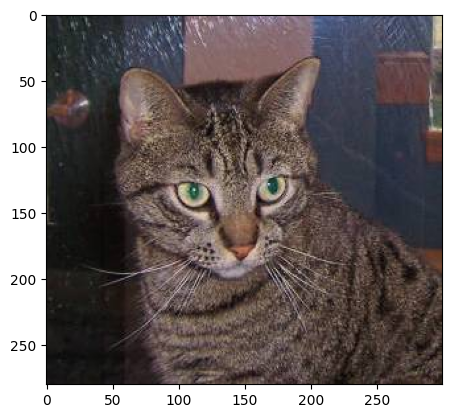

In [9]:
import matplotlib.pyplot as plt
import os

def single_image(img_path):
  if os.path.isfile(img_path):
    img=plt.imread(img_path)
    plt.imshow(img)
    plt.show()

  else:
    print("not displayed")

single_image('/content/drive/MyDrive/google collllab/Cat vs Dog Dataset/Train/Cat/cat.1.jpg')

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/5
62/62 [==============================] - 432s 7s/step - loss: 0.6858 - accuracy: 0.5376 - val_loss: 0.6292 - val_accuracy: 0.6432
Epoch 2/5
62/62 [==============================] - 16s 251ms/step - loss: 0.6298 - accuracy: 0.6657 - val_loss: 0.6319 - val_accuracy: 0.6536
Epoch 3/5
62/62 [==============================] - 14s 217ms/step - loss: 0.5692 - accuracy: 0.7241 - val_loss: 0.6390 - val_accuracy: 0.6667
Epoch 4/5
62/62 [==============================] - 11s 173ms/step - loss: 0.4852 - accuracy: 0.7779 - val_loss: 0.6386 - val_accuracy: 0.6615
Epoch 5/5
62/62 [==============================] - 11s 184ms/step - loss: 0.3447 - accuracy: 0.8506 - val_loss: 0.6498 - val_accuracy: 0.6875


In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Test Accuracy:", accuracy)

13/13 [==============================] - 2s 146ms/step - loss: 0.6701 - accuracy: 0.6825
Test Accuracy: 0.6825000047683716


In [17]:
print(f"Final validation loss: {history.history['val_loss'][-1]}")

Final validation loss: 0.6497815251350403


In [20]:
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]}")

Final validation accuracy: 0.6875


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 64)                2

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_single_image(model, image_path):
    img = image.load_img(image_path, target_size=(150, 150))

    img_array = image.img_to_array(img)

    img_array /= 255.0

    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    predicted_class = int(prediction[0] > 0.5)

    labels = {0: 'Cat', 1: 'Dog'}
    print(f"Prediction: {labels[predicted_class]} - Raw output: {prediction[0]}")

predict_single_image(model, '/content/drive/MyDrive/google collllab/Cat vs Dog Dataset/Train/Cat/cat.120.jpg')


1/1 [==============================] - 0s 278ms/step
Prediction: Cat - Raw output: [0.01695523]


<ipython-input-22-c28d01e51f56>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(prediction[0] > 0.5)


13/13 [==============================] - 3s 178ms/step


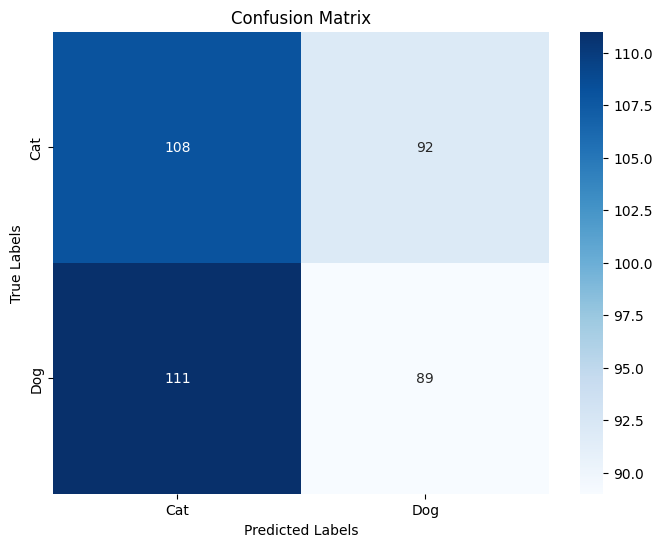

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to get predictions for the entire validation set
def get_predictions(model, generator):
    y_true = generator.classes
    y_pred = model.predict(generator)
    return y_true, (y_pred > 0.5).astype(int)

# Get predictions for the validation set
y_true, y_pred = get_predictions(model, validation_generator)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
